In [2]:
import numpy as np
from scipy.stats import pearsonr, spearmanr

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
rcParams['svg.fonttype'] = 'none'
rcParams['font.size']=15


import py2bit

In [3]:
genomePath = "/home/eramamur/resources/genomes/hg38/hg38.2bit"

In [4]:
def getGCContent(sequence):
    upperCaseSequence = sequence.upper()
    countG = upperCaseSequence.count("G")
    countC = upperCaseSequence.count("C")
    gcContent = 1.0*(countG+countC)/len(upperCaseSequence)
    return gcContent

In [5]:
inFile = "/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_monocyte/humanMonocyteDHS_ppr_summit_centered_1000bp.sorted.narrowPeak"

In [6]:
signalAndGCContent = []

In [7]:
genomeObject = py2bit.open(genomePath)

with open(inFile, 'r') as f:
    for line in f:
        data = line.strip().split("\t")
        chrom = data[0]
        start = int(data[1])
        end = int(data[2])
        sequence = genomeObject.sequence(chrom, start, end)
        gcContent = getGCContent(sequence)
        signal = float(data[6])
        signalAndGCContent.append([signal,gcContent])
genomeObject.close()       

In [8]:
signalAndGCContent = np.array(signalAndGCContent)

/home/eramamur/bin/miniconda3/envs/gpu_keras_theano/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


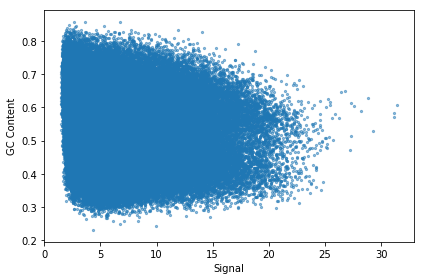

In [9]:
plt.scatter(signalAndGCContent[:,0],
            signalAndGCContent[:,1],
            rasterized=True,
            s=5,
            alpha=0.5
           )
plt.xlabel("Signal")
plt.ylabel("GC Content")
plt.show()

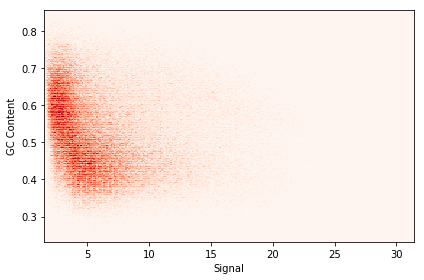

In [17]:
heatmap, xedges, yedges = np.histogram2d(signalAndGCContent[:,0],
                                         signalAndGCContent[:,1],
                                         bins=256
                                        )

extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.imshow(heatmap.T,
           extent=extent,
           origin='lower',
           cmap='Reds',
           aspect="auto"
          )

plt.xlabel("Signal")
plt.ylabel("GC Content")
plt.show()